<a href="https://colab.research.google.com/github/KitoPlayer/ON_lab_zajecia/blob/main/ON_06_laboratorium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://cdn.pixabay.com/photo/2022/03/27/11/23/cat-7094808_960_720.jpg

--2022-03-29 14:31:26--  https://cdn.pixabay.com/photo/2022/03/27/11/23/cat-7094808_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103096 (101K) [image/jpeg]
Saving to: ‘cat-7094808_960_720.jpg’

cat-7094808_960_720 100%[===================>] 100.68K  --.-KB/s    in 0.01s   

2022-03-29 14:31:27 (8.72 MB/s) - ‘cat-7094808_960_720.jpg’ saved [103096/103096]



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from skimage.io import imread, imshow, imsave

In [ ]:
import numpy as np

In [ ]:
im = imread('cat-7094808_960_720.jpg', 1)

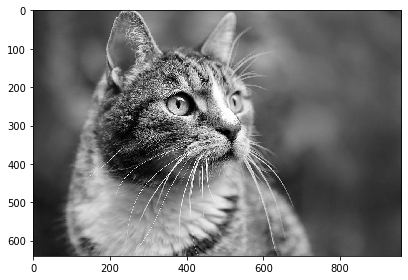

In [ ]:
imshow(im)

In [ ]:
im.shape

(640, 960, 3)

In [ ]:
from skimage.color import rgb2gray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


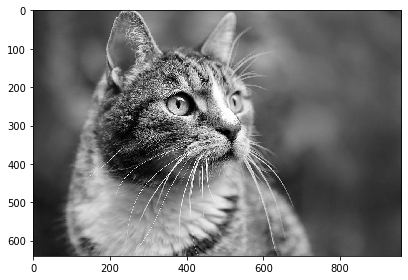

In [ ]:
im2 = imshow(rgb2gray(im))

In [ ]:
U, S, V = np.linalg.svd(im, full_matrices= True)

In [ ]:
U.T @ U

array([[ 1.00000000e+00, -1.11022302e-16,  4.99600361e-16, ...,
         4.29750636e-17,  3.98986399e-17,  2.31273876e-17],
       [-1.11022302e-16,  1.00000000e+00,  1.66533454e-16, ...,
        -3.38271078e-17, -2.60208521e-18, -3.25904397e-17],
       [ 4.99600361e-16,  1.66533454e-16,  1.00000000e+00, ...,
        -1.12485975e-17,  2.72134745e-17, -3.09313933e-18],
       ...,
       [ 4.29750636e-17, -3.38271078e-17, -1.12485975e-17, ...,
         1.00000000e+00,  1.11022302e-15, -5.27355937e-16],
       [ 3.98986399e-17, -2.60208521e-18,  2.72134745e-17, ...,
         1.11022302e-15,  1.00000000e+00, -6.66133815e-16],
       [ 2.31273876e-17, -3.25904397e-17, -3.09313933e-18, ...,
        -5.27355937e-16, -6.66133815e-16,  1.00000000e+00]])

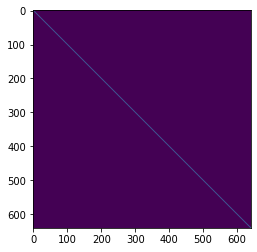

In [ ]:
plt.imshow(U.T @ U) #Macierz ortogonalna

In [ ]:
len(S)

640

In [ ]:
S = S [:50]

In [ ]:
U = U [:,:50]
V = V [:50,:]

In [ ]:
B = np.dot(U, np.dot(np.diag(S), V))

In [ ]:
B [B < 0 ] = 0 

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


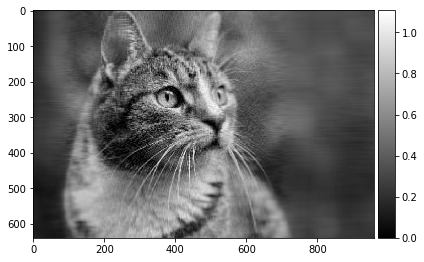

In [ ]:
imshow(B, cmap= 'gray')
imsave("new_cat.jpg", B)

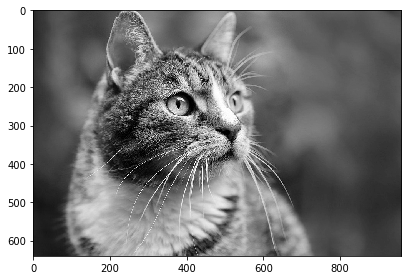

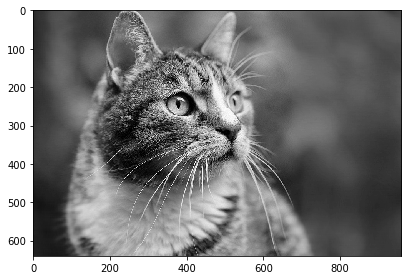

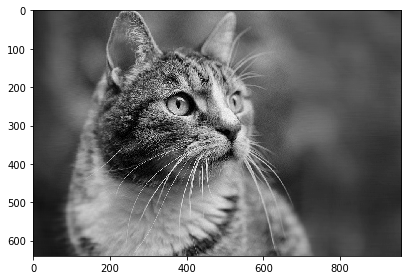

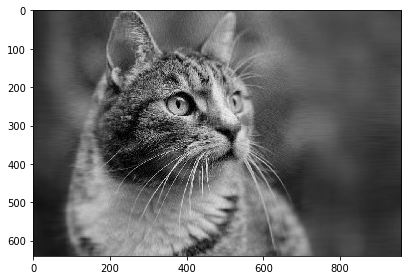

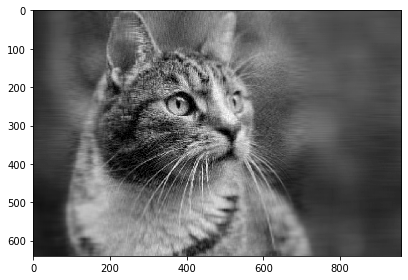

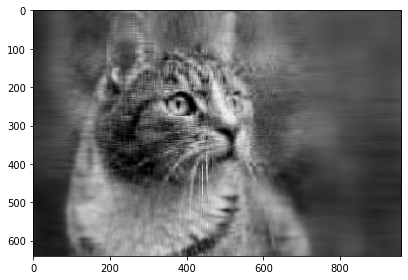

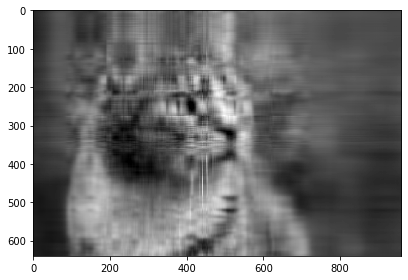

In [ ]:
U, S, V = np.linalg.svd(im, full_matrices= True)
for i in [400, 300, 200, 100, 50, 20, 10]:
  Snew = S [:i]
  Snew = np.diag(Snew)
  Unew = U[:,:i]
  Vnew = V[:i,:]
  B = np.dot(Unew,np.dot (Snew, Vnew))
  B[B < 0 ] = 0 
  B = B/np.max(B)
  imshow(B, cmap= 'gray')
  imsave("new_cat" + str(i) + ".jpg", B)
  plt.show()

##Power method


In [ ]:
x = np.array([1,1])
A = np.array([[0,2], [2,3]])



In [ ]:
np.linalg.eig(A)

(array([-1.,  4.]), array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [ ]:
def normalize(x):
  factor = abs(x).max()
  xn = x / x.max()
  return factor, xn


In [ ]:
for i in range(10):
     x = np.dot(A, x)
     factor, x = normalize (x)

In [ ]:
factor

3.999996821087633

In [ ]:
x

array([0.5000004, 1.       ])

In [ ]:
np.array([0.4472136, -0.89442719])/ - -.89442719

array([ 0.50000001, -1.        ])

In [ ]:
from numpy.linalg import inv


In [ ]:
Ainv = inv(A)


In [ ]:
for i in range(10):
  x = np.dot(Ainv, x)
  factor, x = normalize(x)
  

In [ ]:
1/factor

4.999999999915373

In [ ]:
x

array([1., 1.])

## Rozkład QR


In [ ]:
from numpy.linalg import eig, qr

In [ ]:
A = np.random.rand(5,5)

In [ ]:
B = A.T + A

In [ ]:
eig(B)

(array([ 4.76577826,  1.38808785, -0.14000266,  0.72722408,  0.2699524 ]),
 array([[ 0.45296913,  0.19420424, -0.76704006, -0.33773562, -0.23385438],
        [ 0.38998025, -0.16268341, -0.26578331,  0.60076911,  0.62440789],
        [ 0.50496891,  0.0612522 ,  0.29486969,  0.48897084, -0.64437097],
        [ 0.52948738,  0.4301737 ,  0.48431935, -0.40089119,  0.37324888],
        [ 0.32769481, -0.86430178,  0.13962596, -0.35384304, -0.02997056]]))

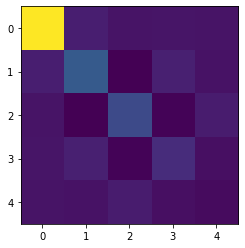

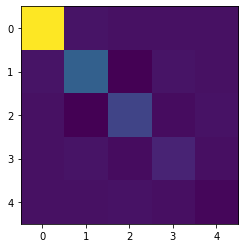

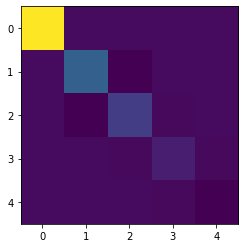

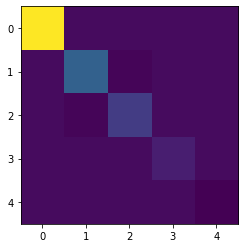

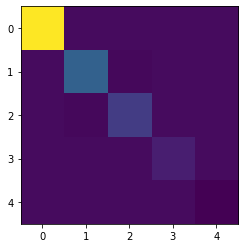

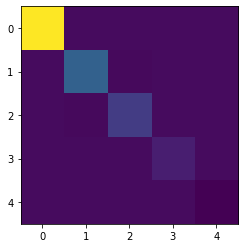

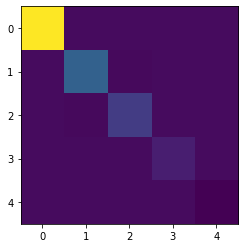

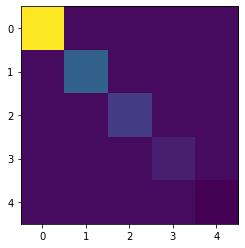

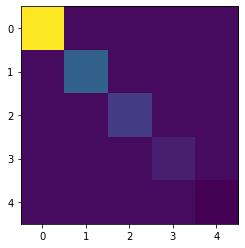

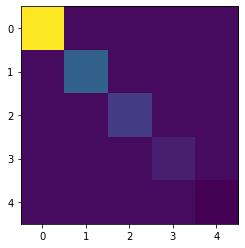

In [ ]:
Q, R = qr(B)
for k in range(10):
  B = np.dot(R, Q)
  Q, R = qr(B)
  plt.imshow(B)
  plt.show()

In [ ]:
np.diagonal(B)

array([ 4.76577826,  1.38808464,  0.72722729,  0.26995239, -0.14000265])

In [ ]:
eig(B)[0]

array([ 4.76577826,  1.38808785,  0.72722408,  0.2699524 , -0.14000266])

##Macierze Hermitowskie

In [ ]:
A = np.array([[1,2+1j],[2 - 1j, 4]]) 

In [ ]:
B = conjugate

In [ ]:
A = np.array([[0,2], [2,3]])

In [ ]:
e, v = eig(A)

In [ ]:
e

array([-1.,  4.])

In [ ]:
v

array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]])

##Zadanie domowe

In [ ]:
np.dot(A, v[0]), e[0] * v[0]

(array([-0.89442719, -3.13049517]), array([0.89442719, 0.4472136 ]))

In [ ]:
np.dot(A, v[1]), e[1] * v[1]

(array([-1.78885438, -1.78885438]), array([ 1.78885438, -3.57770876]))

##Dlaczego L =! P

In [ ]:
Av =! (lambda)*v